In [37]:
import numpy as np

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [39]:
np.random.seed(42)

In [62]:
employee=[f"EMP_{str(i).zfill(3)}" for i in range(1,31)]
dates = pd.date_range("2025-07-01",periods=30,freq="D")

In [64]:
employee

['EMP_001',
 'EMP_002',
 'EMP_003',
 'EMP_004',
 'EMP_005',
 'EMP_006',
 'EMP_007',
 'EMP_008',
 'EMP_009',
 'EMP_010',
 'EMP_011',
 'EMP_012',
 'EMP_013',
 'EMP_014',
 'EMP_015',
 'EMP_016',
 'EMP_017',
 'EMP_018',
 'EMP_019',
 'EMP_020',
 'EMP_021',
 'EMP_022',
 'EMP_023',
 'EMP_024',
 'EMP_025',
 'EMP_026',
 'EMP_027',
 'EMP_028',
 'EMP_029',
 'EMP_030']

In [65]:
data = {
     "Date":np.tile(dates,len(employee)),
     "Employee":np.repeat(employee,len(dates)),
     "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee)).round(2)
}


In [66]:
df = pd.DataFrame(data)

In [67]:
df.to_csv("employee_working_hours.csv",index=False)

In [68]:
df_csv = pd.read_csv("employee_working_hours.csv")

In [69]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee"].nunique())

         Date Employee  Working_Hours
0  2025-07-01  EMP_001           5.25
1  2025-07-02  EMP_001           4.16
2  2025-07-03  EMP_001           5.09
3  2025-07-04  EMP_001           7.50
4  2025-07-05  EMP_001           6.53
       Working_Hours
count     900.000000
mean        7.016256
std         1.757421
min         4.030000
25%         5.430000
50%         7.075000
75%         8.532500
max        10.000000
30


In [70]:
total_hours = df_csv.groupby("Employee")["Working_Hours"].sum().sort_values(ascending = False)

In [71]:
avg_daily = df_csv.groupby("Employee")["Working_Hours"].mean()

In [72]:
threshold_low = 5
threshold_high = 9
df_csv["Low_Hour_Flag"]=df_csv["Working_Hours"] < threshold_low
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"] < threshold_high
print(df_csv[df_csv["Low_Hour_Flag"] | df_csv["High_Hour_Flag"]].head())


         Date Employee  Working_Hours  Low_Hour_Flag  High_Hour_Flag
0  2025-07-01  EMP_001           5.25          False            True
1  2025-07-02  EMP_001           4.16           True            True
2  2025-07-03  EMP_001           5.09          False            True
3  2025-07-04  EMP_001           7.50          False            True
4  2025-07-05  EMP_001           6.53          False            True


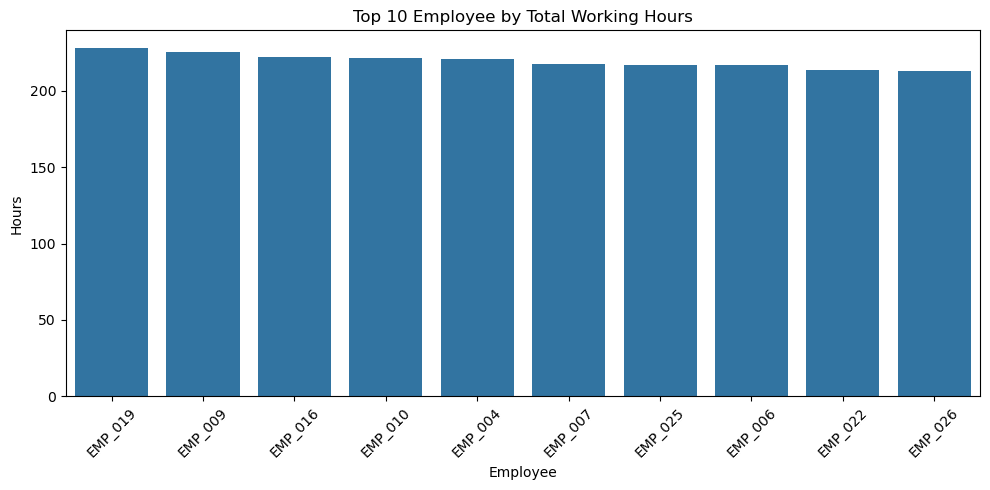

In [73]:
top10 = total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employee by Total Working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

In [81]:
Grades = df.loc[(df["Employee"] == "EMP_001")]

In [82]:
Grades.head()

,Date,Employee,Working_Hours
0,2025-07-01,EMP_001,5.25
1,2025-07-02,EMP_001,4.16
2,2025-07-03,EMP_001,5.09
3,2025-07-04,EMP_001,7.50
4,2025-07-05,EMP_001,6.53


In [87]:
import requests
from bs4 import BeautifulSoup
url = "http://books.toscrape.com"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
books = soup.find_all('article', class_='product_pod')
book_data=[]
for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    book_data.append({
        "Title":title,
        "Price":price
    }) 



In [88]:
df = pd.DataFrame(book_data)
print(df.head())

                                   Title    Price
0                   A Light in the Attic  Â£51.77
1                     Tipping the Velvet  Â£53.74
2                             Soumission  Â£50.10
3                          Sharp Objects  Â£47.82
4  Sapiens: A Brief History of Humankind  Â£54.23
